In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#import io
#iris = pd.read_csv((io.BytesIO(uploaded['IRIS.csv'])))

In [3]:
iris = pd.read_csv('/content/IRIS.csv', encoding='ISO-8859-1')

In [4]:
#dataset initial form
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
iris.shape

(150, 5)

**DATA PREPROCESSING**

In [6]:
#checking the null values
iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#importing libraries for encoding
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

In [13]:
#converted the object data type into integer
for i in iris.columns:
    if is_numeric_dtype(iris[i]):
        continue
    else:
      iris[i] = le.fit_transform(iris[i])

In [14]:
#check dataframe info after update
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**DATA VISULIZATION**

/tmp/ipython-input-15-3922517522.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='species',data = iris, palette = "Set2")


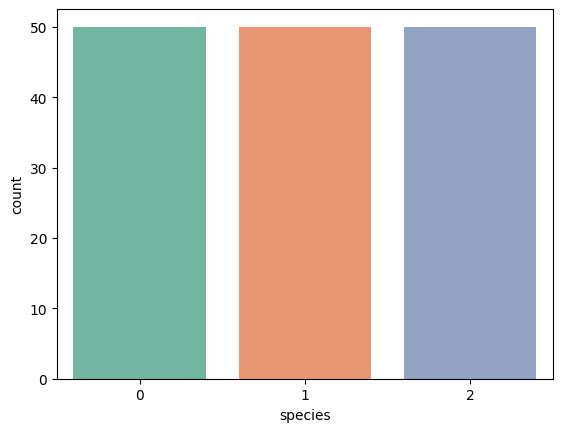

In [15]:
#creating a bar chart to see the count of species category
sns.countplot(x ='species',data = iris, palette = "Set2")
plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

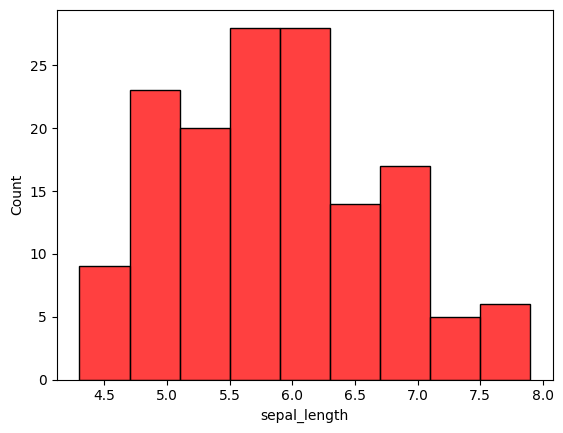

In [16]:
#built a histogram for sepal_length data to know the relation

sns.histplot(data = iris, x = iris.sepal_length, color ='red')

<Axes: xlabel='sepal_width', ylabel='Count'>

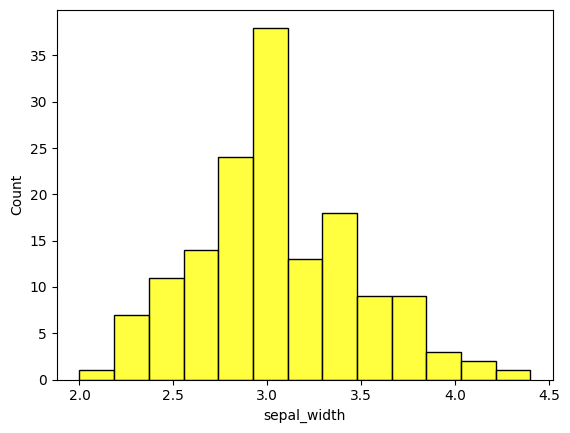

In [19]:
#build a histogram for sepal width to know the relation

sns.histplot(data = iris, x =iris.sepal_width, color = 'yellow')

<Axes: xlabel='petal_length', ylabel='Count'>

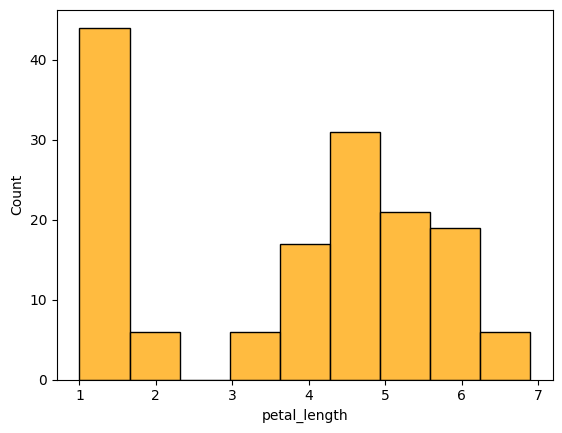

In [21]:
#built a histogram for petal length data to know the relation

sns.histplot(data = iris, x =iris.petal_length,color ='orange')

<Axes: xlabel='petal_width', ylabel='Count'>

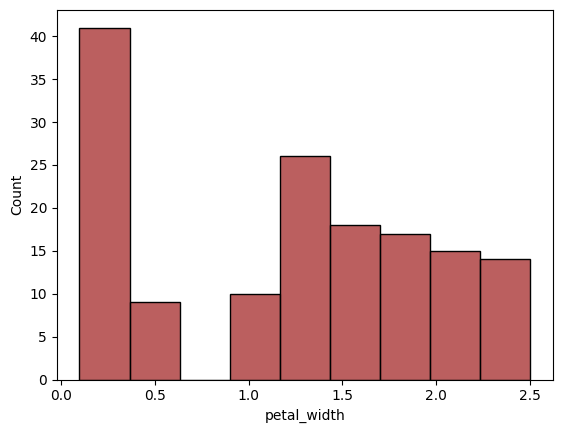

In [22]:
#built a histogram for petal width data to know the relation

sns.histplot(data = iris, x = iris.petal_width, color ='brown')

<Axes: >

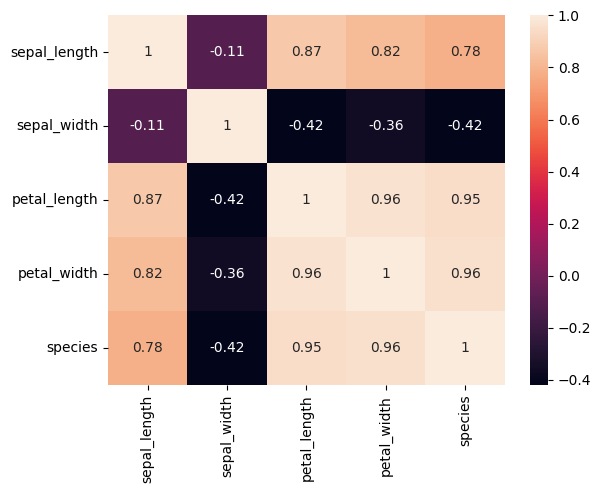

In [23]:
#creating a heatmap to see the feature-wise correlation in the dataset

corr = iris.corr()
sns.heatmap(corr,annot = True)

**DATA PREPARATION**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [26]:
#assinging the predictor and target variable

x = iris.drop(['species'],axis=1)
y = iris.species

In [27]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

**MODEL BUILDING**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
Model = LogisticRegression()
Model.fit(x_train,y_train)

LogisticRegression()

In [30]:
#evaluating the model to verify the accuracy

print("Score for Train data ", Model.score(x_train,y_train))
print("Score for Test data ", Model.score(x_test,y_test))

Score for Train data  0.9619047619047619
Score for Test data  0.9555555555555556


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
#building a machine learning model to verify the accuracy

Model2 = RandomForestClassifier(n_estimators = 300, random_state =100)
Model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=100)

In [35]:
#evaluating the model to verify the accuracy

print ("Score for Train data ",Model2.score(x_train,y_train))
print ("Score for Test data  ",Model2.score(x_test,y_test))

Score for Train data  1.0
Score for Test data   0.9333333333333333


In [37]:
#using knn algorithm

from sklearn.neighbors import KNeighborsClassifier

In [38]:
#building machine learning model and training them

Model3 = KNeighborsClassifier()
Model3.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
#evaluating the model to verify the accuracy

print("Score for the Train data ",Model3.score(x_train,y_train))
print("Score for the Test data ", Model3.score(x_test,y_test))

Score for the Train data  0.9619047619047619
Score for the Test data  0.9555555555555556


**MODEL TESTING**

In [40]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
#for testing, we create a new dataframe with values closer to the any of our data to evaluate.

data = {'sepal_length':[5.1],'sepal_width':[3.5],'petal_length':[1.4],'petal_width':[0.2]}
trail = pd.DataFrame(data)

In [46]:
result = Model.predict(trail)

#displaying the predicted result
print("Result Species:", result[0])

Result Species: 0
